In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
#engine.execute("Select * From measurement limit(5)").fetchall()
#engine.execute("Select * From station limit(5)").fetchall()

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The most recent date in the dataset is: {most_recent_date[0]}')

The most recent date in the dataset is: 2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

dates = dt.date(2017, 8, 23) - dt.timedelta(days=365)
dates

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            filter(Measurement.date.between (dates, dt.date(2017, 8, 23))).group_by('date')

for result in results:
    print(result)

('2016-08-23', 0.45166666666666666)
('2016-08-24', 1.5549999999999997)
('2016-08-25', 0.07714285714285715)
('2016-08-26', 0.016666666666666666)
('2016-08-27', 0.06399999999999999)
('2016-08-28', 0.5166666666666666)
('2016-08-29', 0.24333333333333332)
('2016-08-30', 0.011666666666666667)
('2016-08-31', 0.6359999999999999)
('2016-09-01', 0.006)
('2016-09-02', 0.05)
('2016-09-03', 0.254)
('2016-09-04', 0.276)
('2016-09-05', 0.08499999999999999)
('2016-09-06', 0.246)
('2016-09-07', 0.3333333333333333)
('2016-09-08', 0.07666666666666667)
('2016-09-09', 0.17833333333333332)
('2016-09-10', 0.27999999999999997)
('2016-09-11', 0.25)
('2016-09-12', 0.308)
('2016-09-13', 0.45166666666666666)
('2016-09-14', 2.3800000000000003)
('2016-09-15', 0.8266666666666667)
('2016-09-16', 0.11714285714285715)
('2016-09-17', 0.13599999999999998)
('2016-09-18', 0.10600000000000001)
('2016-09-19', 0.064)
('2016-09-20', 0.14714285714285716)
('2016-09-21', 0.19499999999999998)
('2016-09-22', 0.2057142857142857)
('2

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
results_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
results_df.set_index('Date', inplace=True)
results_df.sort_values(by='Date')
results_df

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


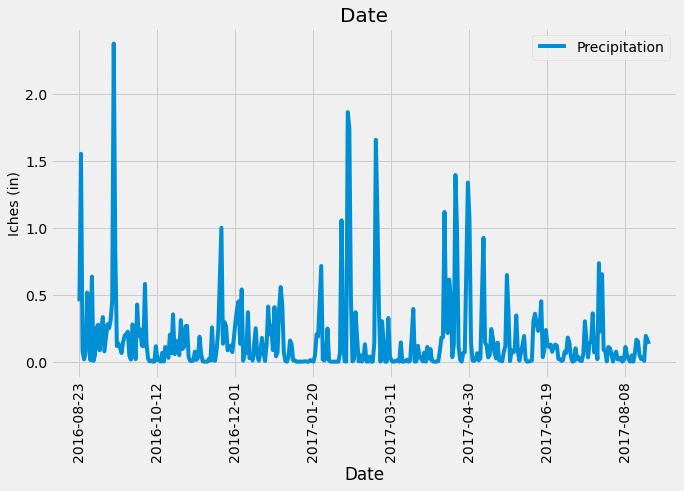

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(figsize=(10,6), rot=90)
plt.ylabel(f'Iches (in)', size=14)
plt.title('Date', size=20)
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
tot_stations = session.query(Station).distinct().count()
print(f"The total number of stations: {tot_stations}")

The total number of stations: 9


In [16]:
print(session.query(Station))

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
acitive_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()
most_active_station = acitive_stations[0]
acitive_stations
print(f"The most active station is :{acitive_stations[0][0]} with {acitive_stations[0][1]} rows")
acitive_stations

The most active station is :USC00519281 with 2772 rows


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == acitive_stations[0][0]).all()
print(f"The minimum temperature for the most active station is : {most_active_stats[0][0]}")
print(f"The maximum temperature for the most active station is : {most_active_stats[0][1]}")
print(f"The average temperature for the most active station is : {round(most_active_stats[0][2],2)}")

The minimum temperature for the most active station is : 54.0
The maximum temperature for the most active station is : 85.0
The average temperature for the most active station is : 71.66


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_yr_temp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == acitive_stations[0][0], Measurement.date.between (dates, dt.date(2017, 8, 23))).\
group_by(Measurement.date)

last_yr_temp_df = pd.DataFrame(last_yr_temp, columns=['Date', 'Temp'])
last_yr_temp_df.set_index('Date', inplace=True)
last_yr_temp_df

,Temp
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


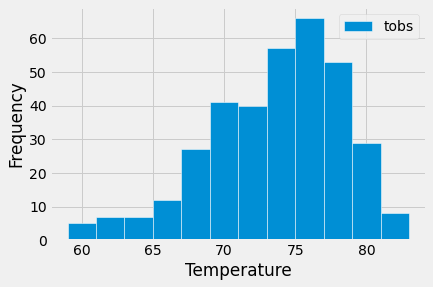

In [20]:
plt.hist(last_yr_temp_df, bins=12, label='tobs', edgecolor='w')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()
plt.show()

# Close session

In [21]:
# Close Session
session.close()